# Python Translate Script 
## Here's the start of our Python script. Thanks for completing it for me! - Dr. X

Authors: Brianna D. Griffin and Dr. X

To set up this code so it runs, I install biopython and pandas

In [7]:
pip install biopython

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [9]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd

## 1 ##
## Dr. X: this gets sequences
### Please finish documenting this function with comments, or in notebook markdown text

This is Dr X's function. It takes a fasta file and pulls out all species names and sequence and puts it in a new dictionary (seq_data_dict) sorted by species name. 

In [1]:
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)

## 2 ##
## YOUR STRING-TRANSLATE FUNCTION 
### Write a function that translates sequences



This code is checking the mito_table to see what it is. 

In [16]:
mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
print(mito_table)  

Table 2 Vertebrate Mitochondrial, SGC1

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA W   | A
T | TTG L   | TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L   | CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA M(s)| ACA T   | AAA K   | AGA Stop| A
A | ATG M(s)| ACG T   | AAG K   | AGG Stop| G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG G   

The following code creates a translate function which translates the mitochondrial dna starting from codon position. It also omits any stop codons. 

In [59]:
def translate(string_nucleotides):
    aa_seq_string = ''
    for i in range(0, len(string_nucleotides),3):
        code = string_nucleotides[i:i+3]
        if code == 'AGA' or code == 'AGG' or code == 'TAA' or code == 'TAG':
            return(aa_seq_string)
        aa = mito_table.forward_table[code]
        aa_seq_string = aa_seq_string + aa
    return(aa_seq_string)

## 3 ##
## YOUR ALTERNATIVE FUNCTION 
### Is there a better way to write the translation function? (Hint: yes there is.) 

I did this via the BioPython tutorial section 3.8 http://biopython.org/DIST/docs/tutorial/Tutorial.pdf

This code translates mRNA into protein coding sequence.

In [4]:
def translate_better(sting_nucleotides):
    coding_dna = Seq(string_nucleotides)
    return(coding_dna.tranlate)

## 4 ##
## YOUR COUNT AA ANALYSIS FUNCTION
### Write a function that calculates the molecular weight of each amino acid sequence.

I utilized biopython tutorial for this: https://biopython.org/wiki/ProtParam

This code makes a function that calculates the molecular weight of an amino acid sequence 

In [88]:
def compute_molecular_weight(aa_seq):
    analysed_aa = ProteinAnalysis(aa_seq)
    return(analysed_aa.molecular_weight())

## 5 ##
## YOUR GC CONTENT ANALYSIS FUNCTION 
### Write a function that calculates the GC-content (proportion of "G" and "C") of each DNA sequence and returns this value.

In [71]:
cytb_seqs = get_sequences_from_file("bears_cytb.fasta") 
bears_df = pd.read_csv("bears_mass.csv") 
species_list = list(bears_df.species)

This code sets bear species type as an index and visualizes the species data

In [91]:
bears_new_df = bears_df.set_index('species')
bears_new_df

,mass
species,
Ursus spelaeus,550.800
Ursus arctos,203.500
Ursus thibetanus,99.714
Melursus ursinus,100.030
Ursus americanus,110.560
Helarctos malayanus,47.020
Ailuropoda melanoleuca,118.200
Tremarctos ornatus,140.700
Ursus maritimus,425.100


Found this on https://python.plainenglish.io/bioinformatics-in-python-dna-toolkit-part-3-gc-content-calculation-618993e0278c

This code creates a function that calls the GC content % of a DNA sequence

In [106]:
def GC_content(dna_seq):
    return round((dna_seq.count('C') + dna_seq.count('G'))/len(dna_seq)*100)

## 6 ## 
## Add two new columns to the bears DataFrame: (1) molecular weight and (2) GC content.
## Set the value to 'NaN' to indicate that these cells are currently empty.


This code takes my bear data frame from section 5 and adds two new columns titles molecular_weight and GC_content. To signify that they are currently empty, I have codified each empty cell with 'NaN'. 

In [98]:
bears_new_df = bears_new_df.assign(molecular_weight = 'NaN', GC_content = 'NaN')
bears_new_df

,mass,molecular_weight,GC_content,"(Ursus spelaeus, molecular_weight)","(Ursus spelaeus, GC_content)","(Ursus arctos, molecular_weight)","(Ursus arctos, GC_content)","(Ursus thibetanus, molecular_weight)","(Ursus thibetanus, GC_content)","(Melursus ursinus, molecular_weight)",...,"(Ursus americanus, molecular_weight)","(Ursus americanus, GC_content)","(Helarctos malayanus, molecular_weight)","(Helarctos malayanus, GC_content)","(Ailuropoda melanoleuca, molecular_weight)","(Ailuropoda melanoleuca, GC_content)","(Tremarctos ornatus, molecular_weight)","(Tremarctos ornatus, GC_content)","(Ursus maritimus, molecular_weight)","(Ursus maritimus, GC_content)"
species,,,,,,,,,,,,,,,,,,,,,
Ursus spelaeus,550.800,NaN,NaN,42458.7992,8,42414.7435,8,42306.6735,8,42551.99,...,42427.7439,8,42560.891,8,42702.1845,7,42384.8266,8,42454.7873,8
Ursus arctos,203.500,NaN,NaN,42458.7992,8,42414.7435,8,42306.6735,8,42551.99,...,42427.7439,8,42560.891,8,42702.1845,7,42384.8266,8,42454.7873,8
Ursus thibetanus,99.714,NaN,NaN,42458.7992,8,42414.7435,8,42306.6735,8,42551.99,...,42427.7439,8,42560.891,8,42702.1845,7,42384.8266,8,42454.7873,8
Melursus ursinus,100.030,NaN,NaN,42458.7992,8,42414.7435,8,42306.6735,8,42551.99,...,42427.7439,8,42560.891,8,42702.1845,7,42384.8266,8,42454.7873,8
Ursus americanus,110.560,NaN,NaN,42458.7992,8,42414.7435,8,42306.6735,8,42551.99,...,42427.7439,8,42560.891,8,42702.1845,7,42384.8266,8,42454.7873,8
Helarctos malayanus,47.020,NaN,NaN,42458.7992,8,42414.7435,8,42306.6735,8,42551.99,...,42427.7439,8,42560.891,8,42702.1845,7,42384.8266,8,42454.7873,8
Ailuropoda melanoleuca,118.200,NaN,NaN,42458.7992,8,42414.7435,8,42306.6735,8,42551.99,...,42427.7439,8,42560.891,8,42702.1845,7,42384.8266,8,42454.7873,8
Tremarctos ornatus,140.700,NaN,NaN,42458.7992,8,42414.7435,8,42306.6735,8,42551.99,...,42427.7439,8,42560.891,8,42702.1845,7,42384.8266,8,42454.7873,8
Ursus maritimus,425.100,NaN,NaN,42458.7992,8,42414.7435,8,42306.6735,8,42551.99,...,42427.7439,8,42560.891,8,42702.1845,7,42384.8266,8,42454.7873,8


## 7 ##
## Write a for-loop that translates each sequence and also gets molecular weight and computes the GC content of each translated sequence and adds those data to DataFrame

The code below starts by creating two empty lists where the molecular weight and GC content of each species will populate. The for statement utilizes functions created in section 2, 4, and 5, by translating the amino acid sequence then computing the molecular weight and the GC % of each species. It overwrites the 'NaN' place-holder with the new data as the table populates. 

For some reason the table was populating multiple times, so I create a new data frame (bears_complete) that has only the data that I want (mass, molecular_weight and GC_content).

In [185]:
mol_weight = []
GC = []

for key, value in cytb_seqs.items():
    aa_seq_string = translate(value)
    mol_weight_add = bears_new_df[key, 'molecular_weight'] = compute_molecular_weight(aa_seq_string)
    GC_add = bears_new_df[key, 'GC_content'] = GC_content(aa_seq_string)
    mol_weight.append(mol_weight_add)
    GC.append(GC_add)
    
bears_new_df['molecular_weight'] = mol_weight
bears_new_df['GC_content'] = GC

bears_complete = bears_new_df[['mass', 'molecular_weight', 'GC_content']]
bears_complete

,mass,molecular_weight,GC_content
species,,,
Ursus spelaeus,550.800,42458.7992,8
Ursus arctos,203.500,42414.7435,8
Ursus thibetanus,99.714,42306.6735,8
Melursus ursinus,100.030,42551.9900,8
Ursus americanus,110.560,42427.7439,8
Helarctos malayanus,47.020,42560.8910,8
Ailuropoda melanoleuca,118.200,42702.1845,7
Tremarctos ornatus,140.700,42384.8266,8
Ursus maritimus,425.100,42454.7873,8


## 8 ##
## Plot a bar-chart of the mass with the x-axes labeled with species names.

### *Q1* What is the largest bear species? 
Ursus spelaeus
### *Q2* What else is interesting about this species?
It's over 2X as big as the other species (except for Ursus maritimus)

I start by installing teh necessary packages to be able to use ggplot. 

In [143]:
pip install pandas plotnine

     |████████████████████████████████| 4.7 MB 4.8 MB/s eta 0:00:01
     |████████████████████████████████| 9.5 MB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 111 kB 3.7 MB/s eta 0:00:01
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.0
    Uninstalling statsmodels-0.12.0:
      Successfully uninstalled statsmodels-0.12.0
Note: you may need to restart the kernel to use updated packages.


In [171]:
import numpy as np
import pandas as pd
from plotnine import ggplot, aes, geom_bar, coord_flip

%matplotlib inline

This code makes the species column a usable variable so that it can be plotted. 

In [186]:
bears_complete2 = bears_complete.reset_index()
bears_complete2

,species,mass,molecular_weight,GC_content
0,Ursus spelaeus,550.800,42458.7992,8
1,Ursus arctos,203.500,42414.7435,8
2,Ursus thibetanus,99.714,42306.6735,8
3,Melursus ursinus,100.030,42551.9900,8
4,Ursus americanus,110.560,42427.7439,8
5,Helarctos malayanus,47.020,42560.8910,8
6,Ailuropoda melanoleuca,118.200,42702.1845,7
7,Tremarctos ornatus,140.700,42384.8266,8
8,Ursus maritimus,425.100,42454.7873,8


This code utilizes ggplot to make a bar plot of the species shwoing their differences in mass. 

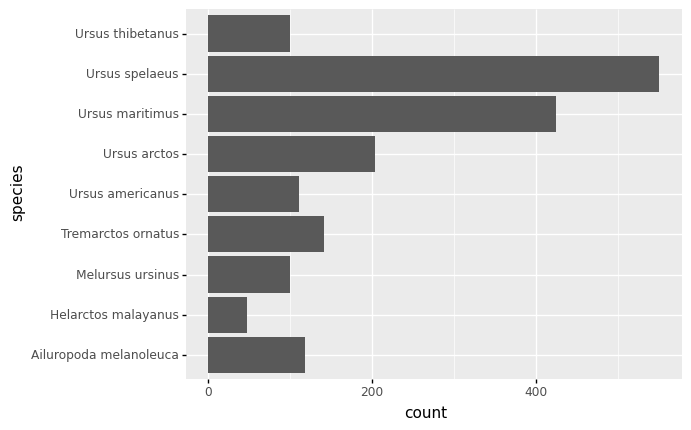

<ggplot: (8774314789373)>

In [187]:
ggplot(aes(x="species", weight="mass"), bears_complete2) + geom_bar() + coord_flip()

## 9 ##
## Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).

This code plots the GC content % of each of the species in relation to their molecular weight.

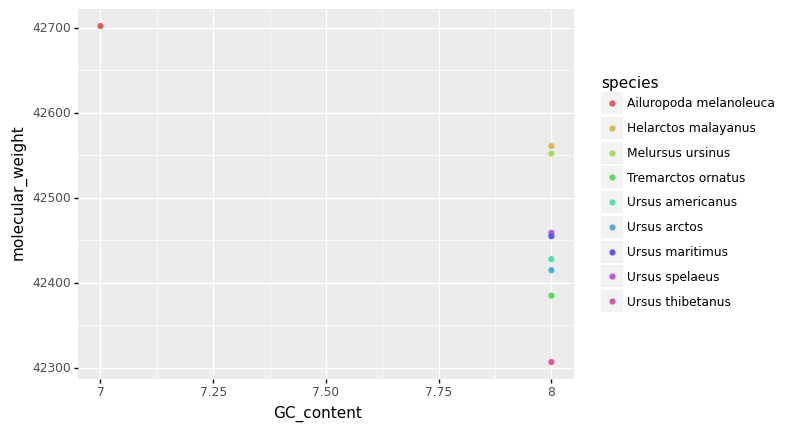

<ggplot: (8774313903876)>

In [188]:
ggplot(bears_complete2, aes(x='GC_content', y='molecular_weight', color='species')) + geom_point()

## 10 ##
## Save the new DataFrame to a file called "bears_mass_cytb.csv"

In [190]:
bears_complete.to_csv('bears_mass_cytb.csv')

## 11 - BONUS ##
## What else can we do with this dataset in Python? 
### Add functions or anything that might be interesting and fun. (optional)

This code is utilizing ggplot to plot the bear species mass in relation to their molecular weight.

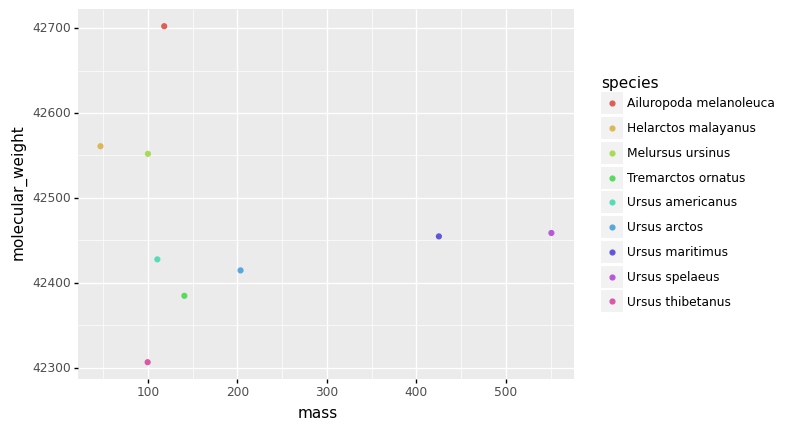

<ggplot: (8774313418460)>

In [189]:
ggplot(bears_complete2, aes(x='mass', y='molecular_weight', color='species')) + geom_point()